In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# EDA

In [5]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [6]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [8]:
# need to predict Item_Outlet_Sales
# we need to merge data first

In [9]:
train['source']='train'
test['source']='test'
test['Item_Outlet_Sales']=0
data=pd.concat([train,test],sort=False)
print(train.shape,test.shape,data.shape)

(8523, 13) (5681, 13) (14204, 13)


In [10]:
data['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

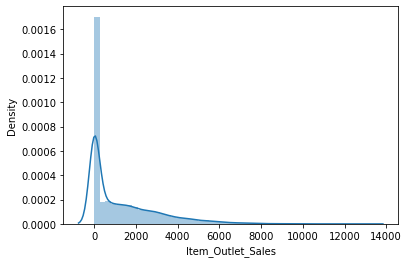

In [11]:
sn.distplot(data['Item_Outlet_Sales'])

In [12]:
# the above data are right skewed

In [13]:
data['Item_Outlet_Sales'].skew()

1.5446838706795232

In [14]:
# to look numerical and catagorical values

data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [15]:
categorical_features=data.select_dtypes(include=[np.object])
categorical_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store,train
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,train


In [16]:
numerical_features=data.select_dtypes(include=[np.number])
numerical_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [17]:
data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [18]:
# Finding missing values

In [19]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [20]:
#observations-item visibility can't be 0,since if product is being sold in store
# outlet establishment year vary from 1985 to 2009, we need to convert it as how old the store is to make relevance

data.apply(lambda x:len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [21]:
# frequency of catagories

for col in categorical_features:
    print('\n%s column:'%col)
    print(data[col].value_counts())


Item_Identifier column:
NCO54    10
NCR53    10
FDJ20    10
FDU21    10
FDS47    10
         ..
FDO33     7
FDS22     7
FDL50     7
DRN11     7
NCL42     7
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content column:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Type column:
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Outlet_Identifier column:
OUT027    1559
OUT013    1553
OUT049    1550
OUT035    1550
OUT046    1550
OUT045    1548
OUT0

In [22]:
# looking outlet size,outlet location and outlet type distribution in item outlet sale

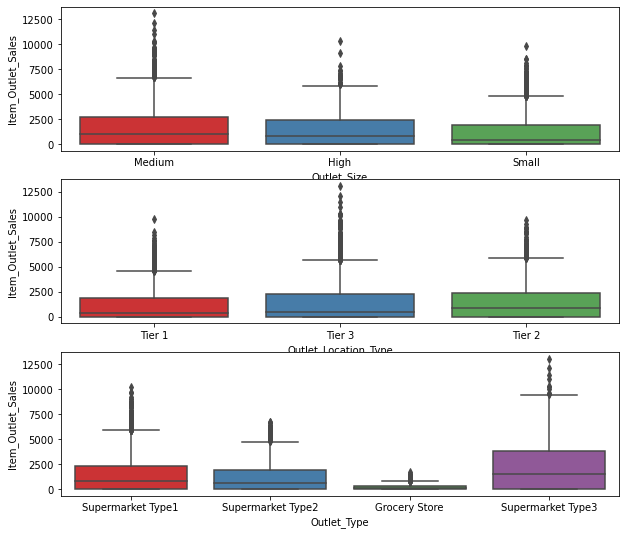

In [23]:
plt.figure(figsize=(10,9))
plt.subplot(311)
sn.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data,palette="Set1")

plt.subplot(312)
sn.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data,palette="Set1")

plt.subplot(313)
sn.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data,palette="Set1")

plt.show()

In [24]:
# Data cleaning and managing missing values
# item_weight missing values will replace by mean
# outlet_size is cataogorical so replaced by mode

In [25]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [26]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [27]:
# medium is occured more so null values will be replaced by medium

data['Outlet_Size'].fillna('Medium',inplace=True)

In [28]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [29]:
# modifying item visibility, as it has zero value which makes no relavance as product is being sold

In [30]:
data[data['Item_Visibility']==0]['Item_Visibility'].count()

879

In [31]:
data['Item_Visibility'].fillna(data['Item_Visibility'].median(),inplace=True)

In [32]:
# item type has 16 categories and item identifier has unique id-FD=food,DR=drink and NC=non consumable,so used item identifier varibale to create new column

In [33]:
# get the first two characters of ID:

data['Item_Type_Combined']=data['Item_Identifier'].apply(lambda x:x[0:2])
# rename them to categories like:

data['Item_Type_Combined']=data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [34]:
# modify item fat content

In [35]:
# change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


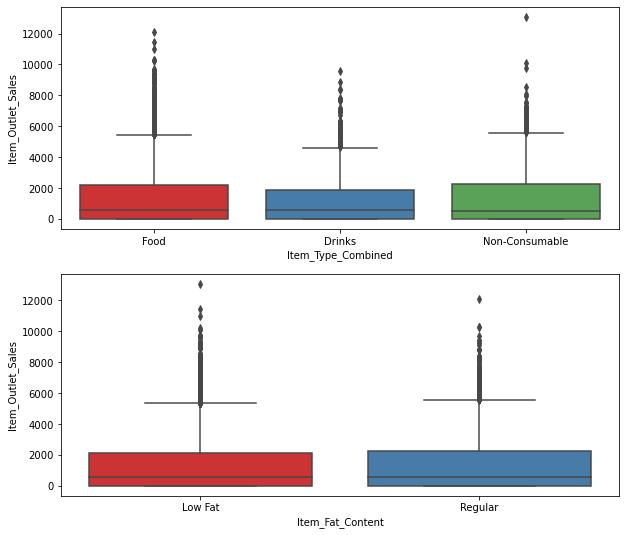

In [36]:
plt.figure(figsize=(10,9))
plt.subplot(211)
sn.boxplot(x='Item_Type_Combined',y='Item_Outlet_Sales',data=data,palette="Set1")

plt.subplot(212)
sn.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=data,palette="Set1")



plt.show()

In [37]:
data.index=data['Outlet_Establishment_Year']
data.index

Int64Index([1999, 2009, 1999, 1998, 1987, 2009, 1987, 1985, 2002, 2007,
            ...
            1999, 1999, 2009, 1997, 1999, 1997, 2009, 2002, 2007, 2002],
           dtype='int64', name='Outlet_Establishment_Year', length=14204)

In [38]:
df=data.loc[:,['Item_Outlet_Sales']]
df.head()

,Item_Outlet_Sales
Outlet_Establishment_Year,
1999,3735.1380
2009,443.4228
1999,2097.2700
1998,732.3800
1987,994.7052


In [39]:
data['Outlet_Years']=2009-data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

In [40]:
temp_data=data.loc[data['Outlet_Establishment_Year']==1998]

In [41]:
temp_data['Outlet_Type'].value_counts()

Grocery Store    925
Name: Outlet_Type, dtype: int64

In [42]:
# from above can see there is only grocery store type as outlet type thus item outlet sale is minimum,before taking decision to remove this need to check with test data also


In [43]:
test_temp_data=test.loc[test['Outlet_Establishment_Year']==1998]
test_temp_data['Outlet_Type'].value_counts()

Grocery Store    370
Name: Outlet_Type, dtype: int64

In [44]:
# we cant remove so keeping

In [45]:
#Numerical and one hot encoding of categorical values

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Outlet']=le.fit_transform(data['Outlet_Identifier'])
var_mod=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le=LabelEncoder()
for i in var_mod:
    data[i]=le.fit_transform(data[i])

In [47]:
#one hot coding
# now need to create dummy variables for these label encoded variables to avoid algorithm ranking
data=pd.get_dummies(data,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet'])
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

In [48]:
#drop the columns which have been converted to different types
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)


In [49]:
train=data.loc[data['source']=="train"]
test=data.loc[data['source']=="test"]

In [50]:
# dropping unnecessary columns

test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

In [51]:
x_train=train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)

In [52]:
y_train=train['Item_Outlet_Sales']

In [53]:
x_test=test.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()

In [54]:
#Linear Regression

lr=LinearRegression()

In [55]:
lr.fit(x_train,y_train)

LinearRegression()

In [56]:
lr.score(x_train,y_train)

0.5635180059745906

# Ensemble technique

In [59]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(max_depth=20,min_samples_leaf=100)
tree.fit(x_train,y_train)
tree_pred=tree.predict(x_test)

In [60]:
tree_accuracy=tree.score(x_train,y_train)*100
tree_accuracy

61.53039111113097

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=100,n_jobs=4)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
rf_accuracy=rf.score(x_train,y_train)*100
rf_accuracy

60.8143289952092

# Conclusions

In [71]:
#For me Decision Tree model is predicting high

# Saving the model

In [72]:
import joblib
joblib.dump(rf,"bigmartdata.pkl")

['bigmartdata.pkl']